In [76]:
import pandas as pd
import numpy as np
butterflies = pd.read_csv('butterflies_data.csv')
pdp = pd.read_csv('pdp_data.csv')

In [77]:
butterflies.head()

,id,year,state,number
0,855061862,97,NC,1
1,855159952,97,FL,1
2,855160200,97,FL,1
3,855247856,97,FL,1
4,855281548,97,FL,1


In [78]:
pdp.head()

,sample_id,state,year,concentration,pesticide_code,pesticide_name
0,MO9701140340WHUS3,MO,97,0.033,052,Malathion
1,CA9701060304AJCA1,CA,97,0.330,157,Thiabendazole
2,CA9701070112AJCA1,CA,97,0.013,042,Azinphos methyl
3,CA9701070112AJCA1,CA,97,0.310,157,Thiabendazole
4,CA9702240307AJCA1,CA,97,0.640,157,Thiabendazole


In [79]:
pdp['year'] = np.where(
    (pdp['year'] >= 0) & (pdp['year'] <= 20),
    2000 + pdp['year'],
    np.where(
        (pdp['year'] > 20) & (pdp['year'] <= 99),
        1900 + pdp['year'],
        np.nan
    ))
pdp['year'] = pdp['year'].astype(int)
pdp.dropna()

,sample_id,state,year,concentration,pesticide_code,pesticide_name
0,MO9701140340WHUS3,MO,1997,0.0330,052,Malathion
1,CA9701060304AJCA1,CA,1997,0.3300,157,Thiabendazole
2,CA9701070112AJCA1,CA,1997,0.0130,042,Azinphos methyl
3,CA9701070112AJCA1,CA,1997,0.3100,157,Thiabendazole
4,CA9702240307AJCA1,CA,1997,0.6400,157,Thiabendazole
...,...,...,...,...,...,...
514135,TX2001130216BNOH1,TX,2020,0.0072,B48,Azoxystrobin
514136,TX2006010216BNOH1P,TX,2020,0.0033,B48,Azoxystrobin
514137,TX2010050108BNOH1P,TX,2020,0.0068,B48,Azoxystrobin
514138,TX2006010216BNOH1P,TX,2020,0.0172,B52,Buprofezin


In [80]:
pdp['max_concentration'] = pdp.groupby('pesticide_name')['concentration'].transform('max')
pdp['relative_concentration'] = pdp['concentration'] / pdp['max_concentration']
pdp.head()

,sample_id,state,year,concentration,pesticide_code,pesticide_name,max_concentration,relative_concentration
0,MO9701140340WHUS3,MO,1997,0.033,052,Malathion,331.0,0.000100
1,CA9701060304AJCA1,CA,1997,0.330,157,Thiabendazole,7.4,0.044595
2,CA9701070112AJCA1,CA,1997,0.013,042,Azinphos methyl,45.0,0.000289
3,CA9701070112AJCA1,CA,1997,0.310,157,Thiabendazole,7.4,0.041892
4,CA9702240307AJCA1,CA,1997,0.640,157,Thiabendazole,7.4,0.086486


In [81]:
annual_pesticide_avgs = pdp.groupby('year')['relative_concentration'].mean().reset_index()
annual_pesticide_avgs

,year,relative_concentration
0,1997,0.028982
1,1998,0.032435
2,1999,0.024809
3,2000,0.021284
4,2001,0.027064
5,2002,0.027148
6,2003,0.019262
7,2004,0.023628
8,2005,0.025634
9,2006,0.015573


In [82]:
butterfly_sightings = butterflies.groupby('year')['number'].sum().reset_index()
butterfly_sightings['year'] = np.where(
    (butterfly_sightings['year'] >= 0) & (butterfly_sightings['year'] <= 20),
    2000 + butterfly_sightings['year'],
    np.where(
        (butterfly_sightings['year'] > 20) & (butterfly_sightings['year'] <= 99),
        1900 + butterfly_sightings['year'],
        np.nan
    ))
butterfly_sightings['year'] = butterfly_sightings['year'].astype(int)
butterfly_sightings.sort_values('year', ascending=True)
butterfly_sightings

,year,number
0,2000,1330
1,2001,2319
2,2002,2080
3,2003,9818
4,2004,2692
5,2005,59687
6,2006,12643
7,2007,4101557
8,2008,78883
9,2009,225399


<Figure size 1000x600 with 0 Axes>

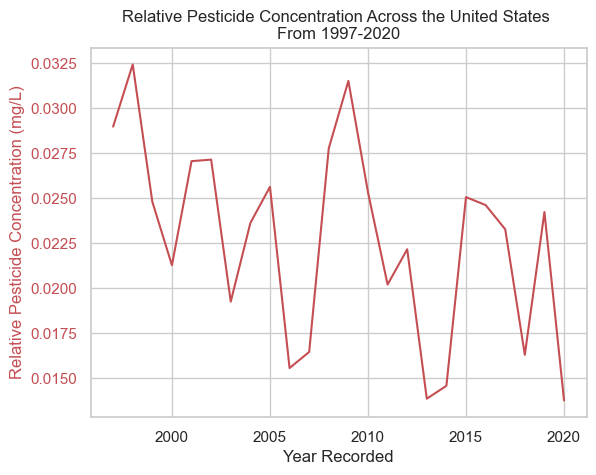

In [87]:
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(10,6))
fig, ax1 = plt.subplots()

# Plot the first measurement (y1-axis)
ax1.plot(annual_pesticide_avgs['year'], annual_pesticide_avgs['relative_concentration'], color='r', label='Relative Pesticide Concentration and Monarch Butterfly Sightings \nover 23 Years')
ax1.set_xlabel('Year Recorded')
ax1.set_ylabel('Relative Pesticide Concentration (mg/L)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

plt.title("Relative Pesticide Concentration Across the United States \nFrom 1997-2020")

# Show the plot
plt.show()

In [84]:
print(butterfly_sightings['number'].max())
print(butterfly_sightings['number'].min())

10267718
672


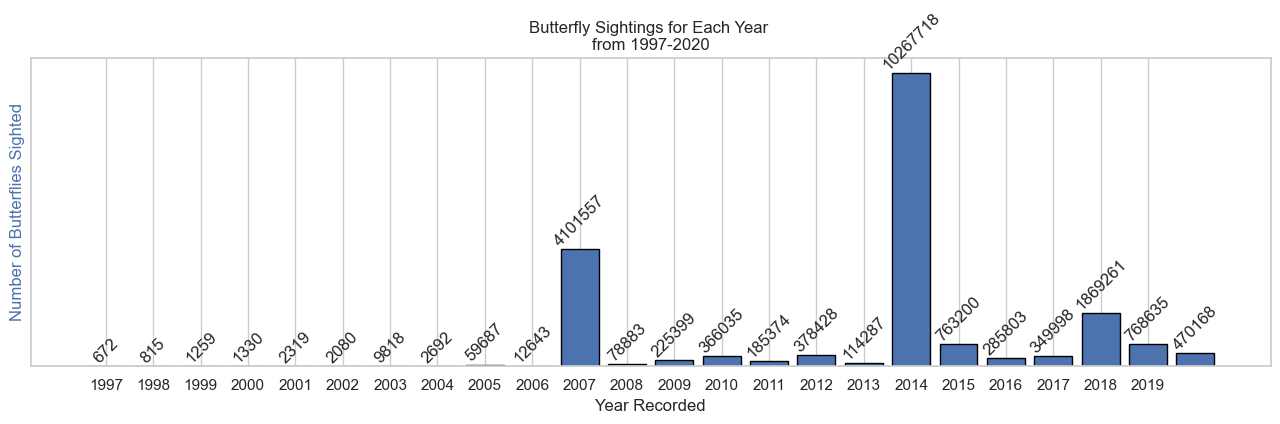

In [86]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Create a bar chart
plt.figure(figsize=(16,4))
bars = plt.bar(butterfly_sightings['year'], butterfly_sightings['number'], color='b', edgecolor='black')

# Add titles and labels
plt.title('Butterfly Sightings for Each Year \nfrom 1997-2020')
plt.xlabel('Year Recorded')
plt.ylabel('Number of Butterflies Sighted', color='b')

plt.bar_label(bars, labels=butterfly_sightings['number'], label_type='edge', rotation=45)

# Remove y-axis ticks and labels
plt.xticks(ticks=range(1997, 2020))
plt.yticks([])

# Show the plot
plt.show()

# Show the plot
plt.show()